# Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_csv('AirlinesData.csv',parse_dates=True)
data

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [22]:
data1=data.copy()

In [23]:
data.isnull()

,Month,Passengers
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
91,False,False
92,False,False
93,False,False
94,False,False


<Axes: >

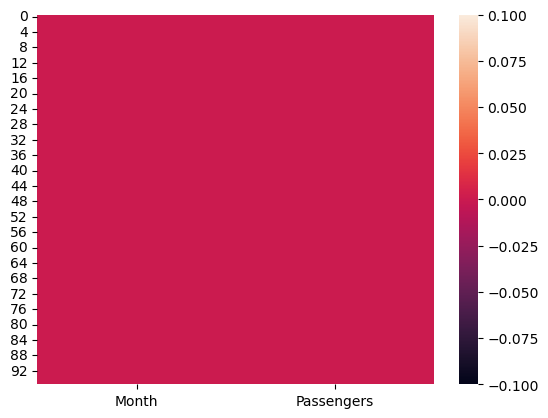

In [24]:
sns.heatmap(data.isnull())

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [26]:
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')
data.set_index('Month', inplace=True)
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [27]:
data.index.freq='MS'

In [28]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL,seasonal_decompose

In [30]:
data1 = pd.DataFrame(data1)
data1['Month'] = pd.to_datetime(data1['Month'], format='%b-%y')

In [31]:
data1['MonthStr'] = data1['Month'].dt.strftime('%b-%y')

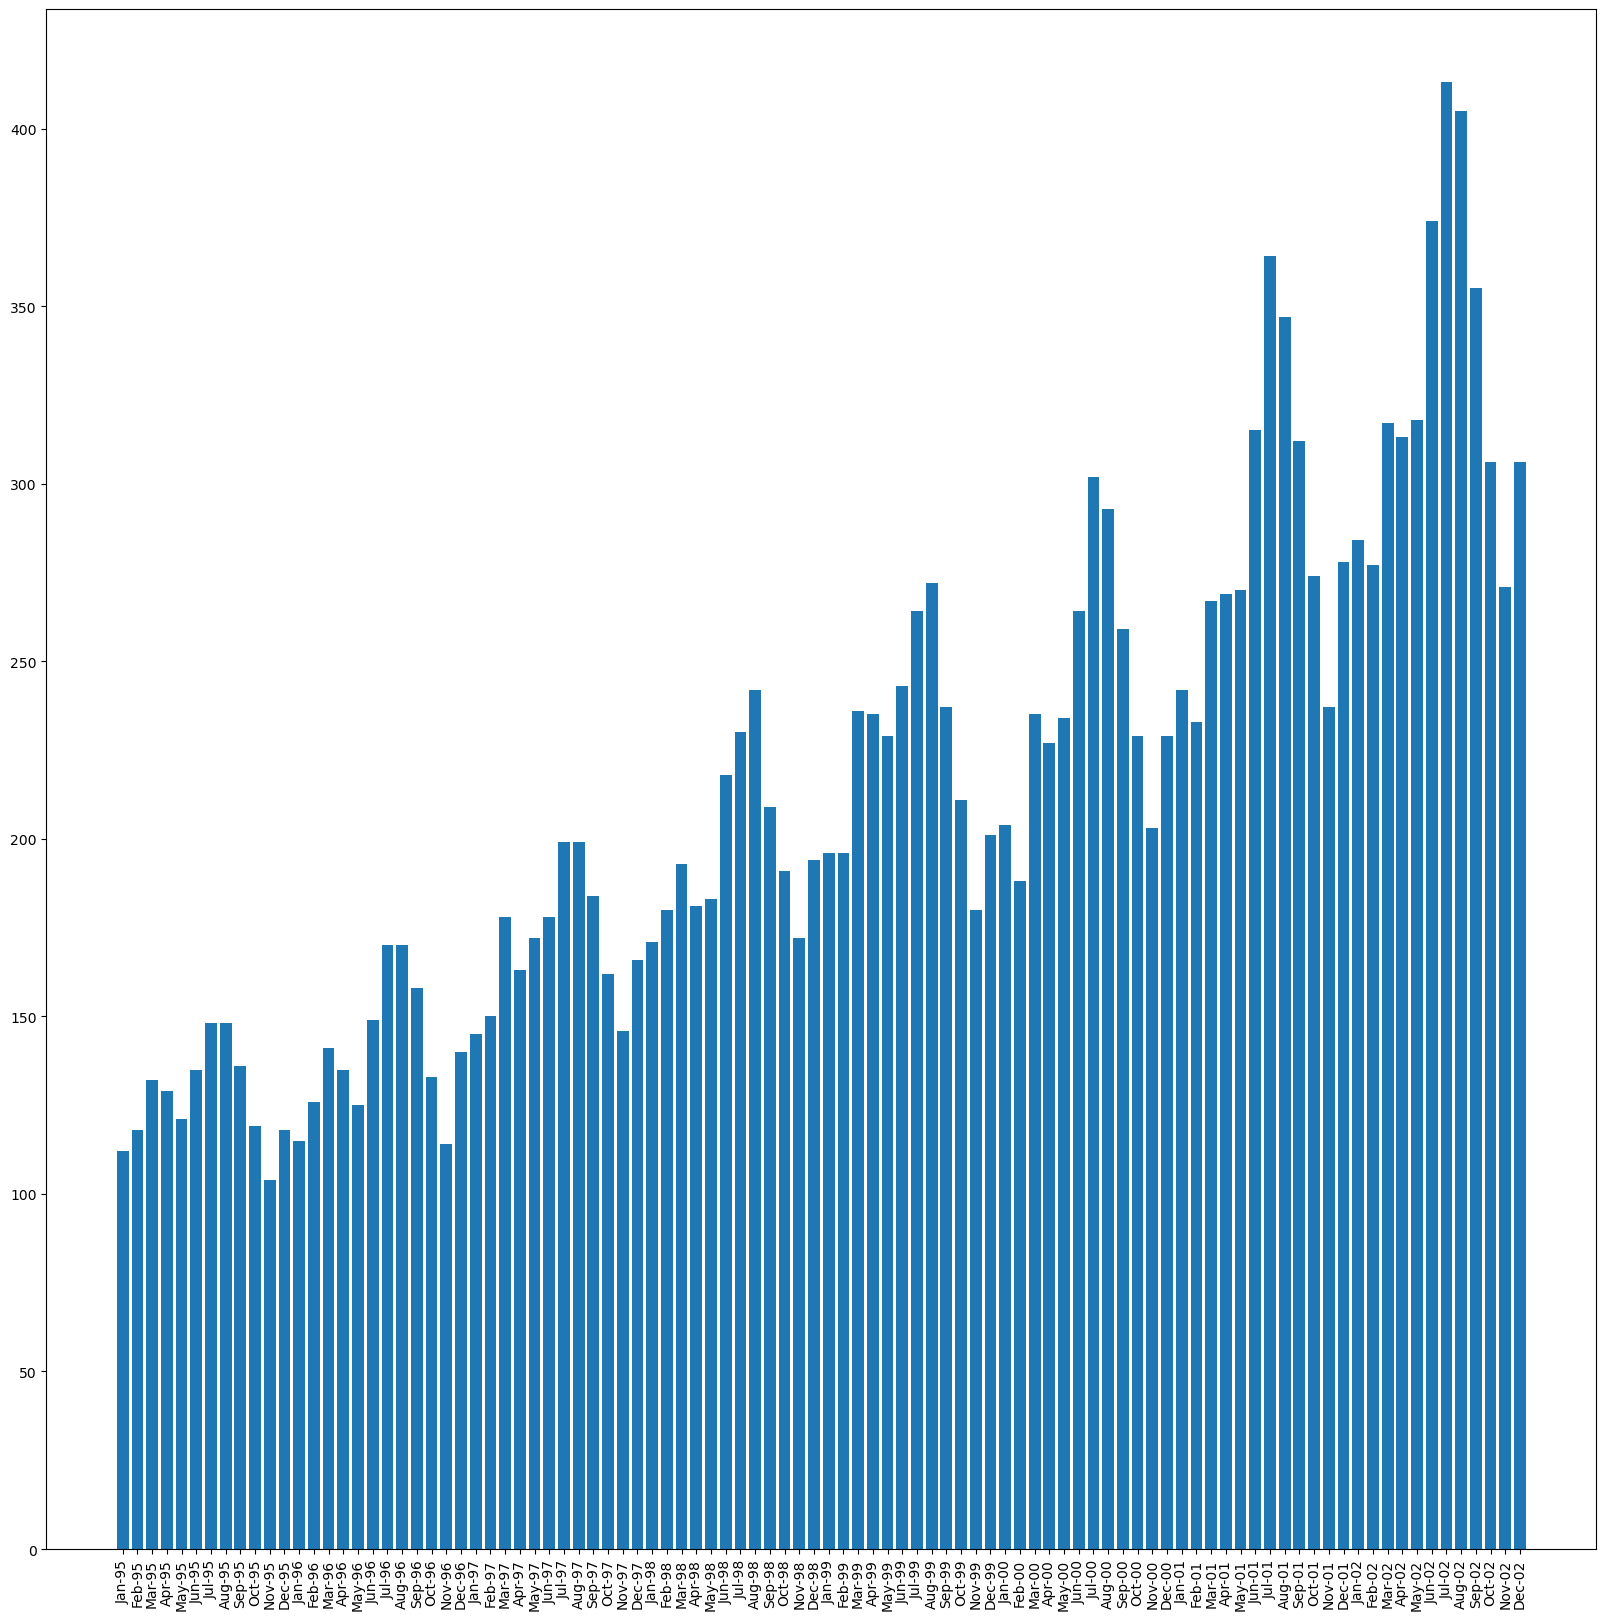

In [34]:
plt.figure(figsize=(20,20))
plt.bar(data1['MonthStr'], data1['Passengers'])
plt.xticks(rotation=90)
plt.show()

(array([13., 14., 19.,  9., 14., 12.,  9.,  1.,  3.,  2.]),
 array([104. , 134.9, 165.8, 196.7, 227.6, 258.5, 289.4, 320.3, 351.2,
        382.1, 413. ]),
 <BarContainer object of 10 artists>)

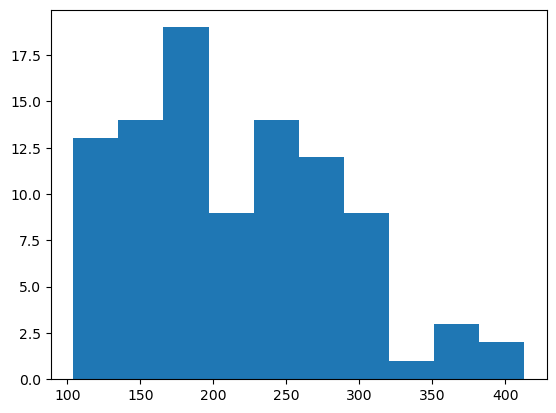

In [40]:
plt.hist(data1['Passengers'], bins=10)

{'whiskers': [<matplotlib.lines.Line2D at 0x203086a4a10>,
 'caps': [<matplotlib.lines.Line2D at 0x20308700210>,
 'boxes': [<matplotlib.lines.Line2D at 0x203086b6990>],
 'medians': [<matplotlib.lines.Line2D at 0x20308700fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x203086f2ad0>],
 'means': []}

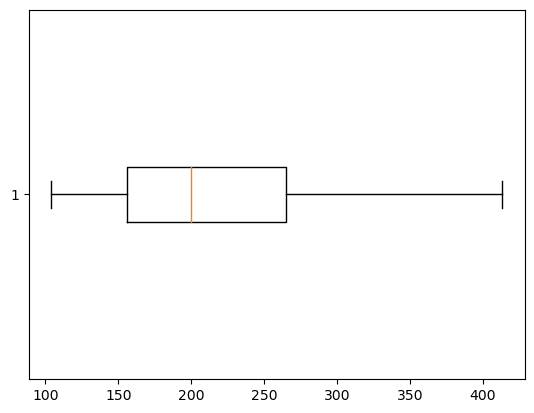

In [41]:
plt.boxplot(data1['Passengers'], vert=False)

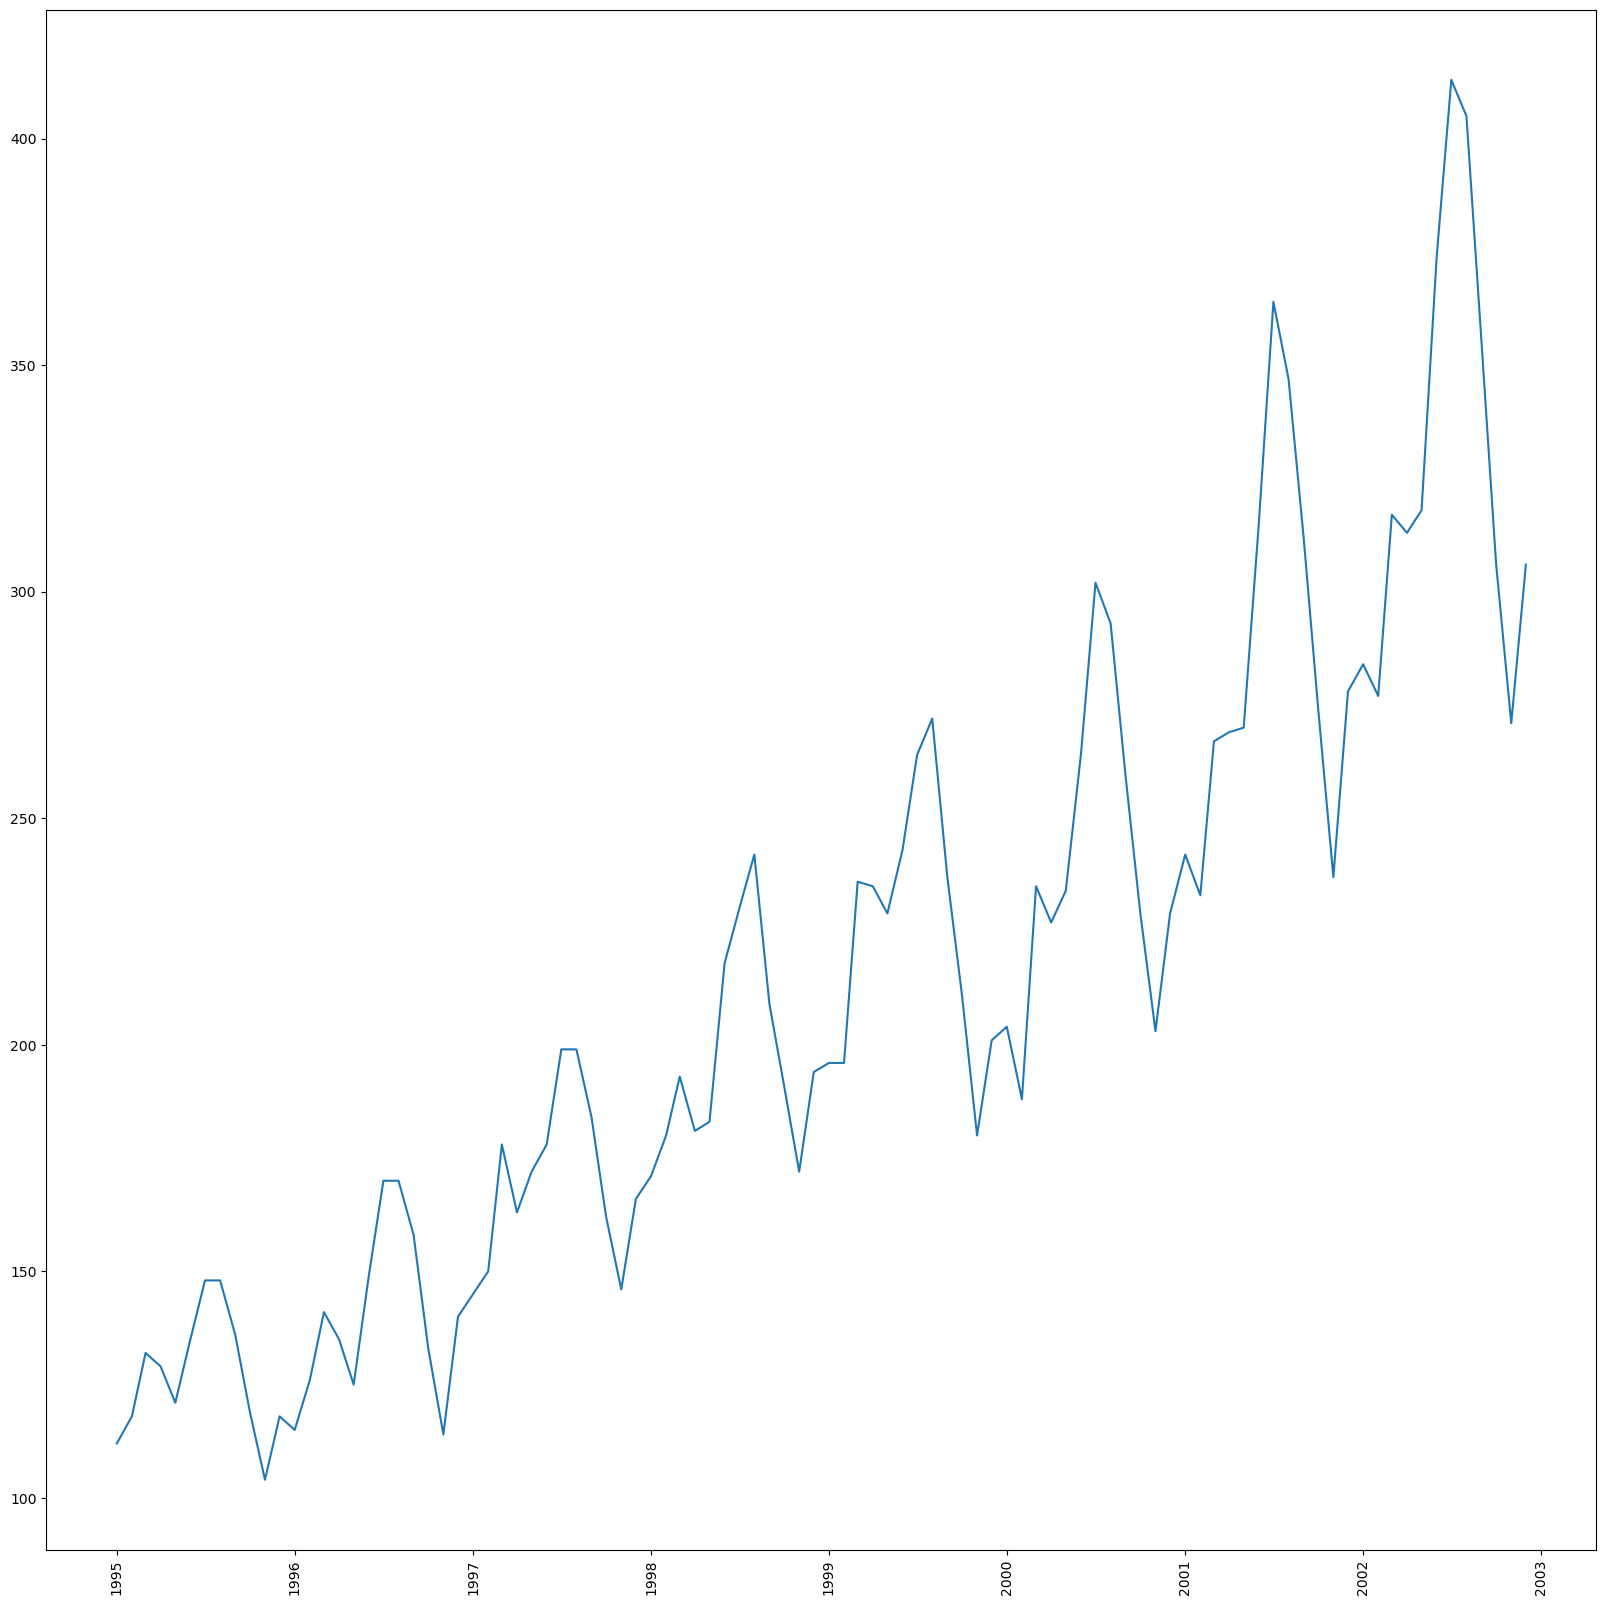

In [35]:
plt.figure(figsize=(20,20))
plt.plot(data)
plt.xticks(rotation=90)
plt.show()

In [36]:
endog = data['Passengers']
seasonal_period = 9 
stl = STL(endog, seasonal=seasonal_period)
res = stl.fit()

[]

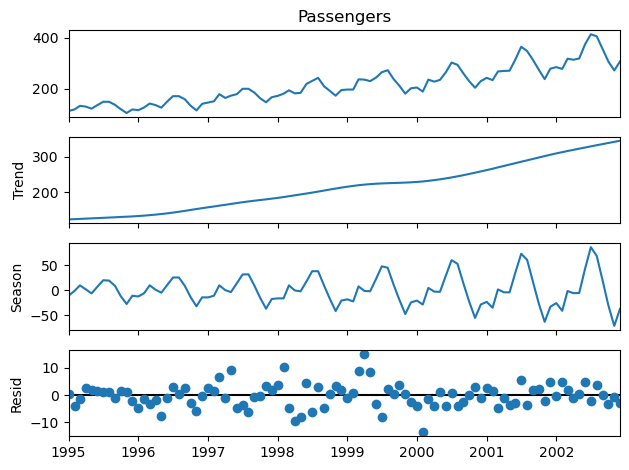

In [37]:
res.plot()
plt.plot()

In [38]:
train_length=int(len(data)*0.75)
test_length=len(data)-train_length
train_length,test_length

(72, 24)

Build the simple Exponential smoothing

In [13]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [14]:
train_data=data.iloc[:train_length]
test_data=data.iloc[train_length:]

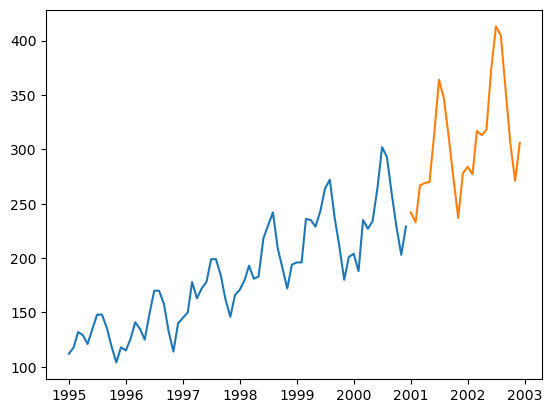

In [15]:
plt.plot(train_data)
plt.plot(test_data)
plt.show()

In [16]:
sesmodel=SimpleExpSmoothing(train_data['Passengers']).fit(smoothing_level=0.2)

C:\Users\sreen\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [17]:
testresult=test_data.copy()

In [18]:
ses=sesmodel.forecast(test_length)
ses.head()

2001-01-01    237.974268
2001-02-01    237.974268
2001-03-01    237.974268
2001-04-01    237.974268
2001-05-01    237.974268
Freq: MS, dtype: float64

In [19]:
testresult['SES_Model']=ses
testresult.head(3)

,Passengers,SES_Model
Month,,
2001-01-01,242,237.974268
2001-02-01,233,237.974268
2001-03-01,267,237.974268


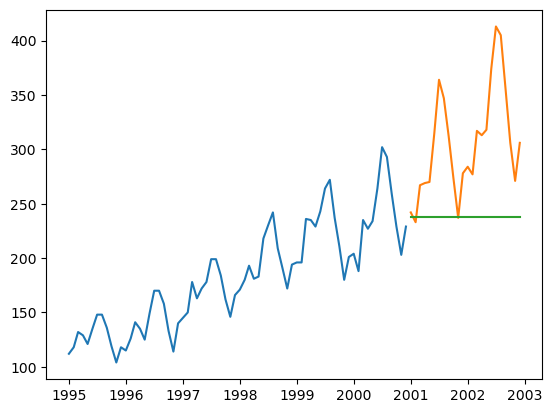

In [20]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(testresult['SES_Model'])
plt.show()

In [21]:
mse1=mean_squared_error(test_data['Passengers'],testresult['SES_Model'])
rmse2=np.sqrt(mse1)
mae3=mean_absolute_error(test_data['Passengers'],testresult['SES_Model'])
mape4=mean_absolute_percentage_error(test_data['Passengers'],testresult['SES_Model'])

In [22]:
test_metrics_ses=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [23]:
test_metrics_ses['SES_Model']=[mse1,rmse2,mae3,mape4]
test_metrics_ses

,SES_Model
MSE,6997.881659
RMSE,83.653342
MAE,68.646443
MAPE,0.205919


Double Exponential Smoothing

Double Exponential Smoothing Adding

In [24]:
desadd_model=ExponentialSmoothing(train_data['Passengers'],trend='add').fit()

In [25]:
testresult_da=test_data.copy()

In [26]:
testresult_da['DES_Add']=desadd_model.forecast(test_length)
testresult_da.head(3)

,Passengers,DES_Add
Month,,
2001-01-01,242,230.691016
2001-02-01,233,232.382517
2001-03-01,267,234.074018


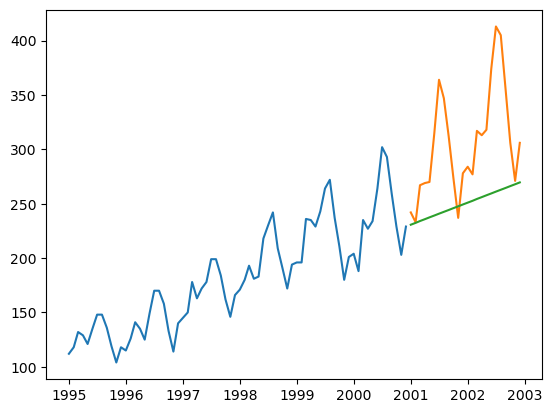

In [27]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(testresult_da['DES_Add'])
plt.show()

In [28]:
mse5=mean_squared_error(test_data['Passengers'],testresult_da['DES_Add'])
rmse6=np.sqrt(mse5)
mae7=mean_absolute_error(test_data['Passengers'],testresult_da['DES_Add'])
mape8=mean_absolute_percentage_error(test_data['Passengers'],testresult_da['DES_Add'])

In [29]:
test_metrics_da=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [30]:
test_metrics_da['DES_Add']=[mse5,rmse6,mae7,mape8]
test_metrics_da

,DES_Add
MSE,5062.761521
RMSE,71.153085
MAE,56.865556
MAPE,0.169917


Double Exponential Smoothing Multiplicative

In [31]:
desmul_model=ExponentialSmoothing(train_data['Passengers'],trend='mul').fit()

In [32]:
testresult_dm=test_data.copy()

In [33]:
testresult_dm['DES_Mul']=desmul_model.forecast(test_length)
testresult_dm.head(3)

,Passengers,DES_Mul
Month,,
2001-01-01,242,229.617770
2001-02-01,233,230.319547
2001-03-01,267,231.023469


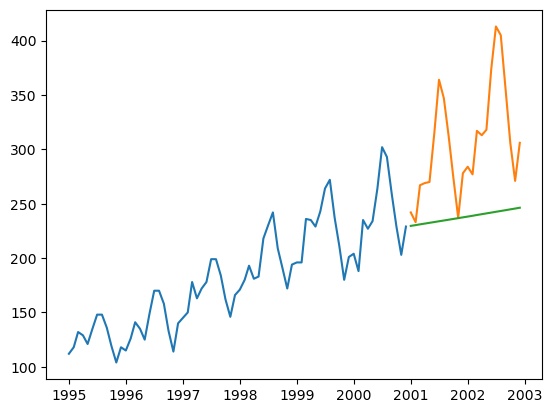

In [34]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(testresult_dm['DES_Mul'])
plt.show()

In [35]:
mse9=mean_squared_error(test_data['Passengers'],testresult_dm['DES_Mul'])
rmse10=np.sqrt(mse9)
mae11=mean_absolute_error(test_data['Passengers'],testresult_dm['DES_Mul'])
mape12=mean_absolute_percentage_error(test_data['Passengers'],testresult_dm['DES_Mul'])

In [36]:
test_metrics_dm=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [37]:
test_metrics_dm['DES_Mul']=[mse9,rmse10,mae11,mape12]
test_metrics_dm

,DES_Mul
MSE,6796.998343
RMSE,82.443910
MAE,68.252977
MAPE,0.205466


Triple Exponential Smoothing TR:Add,SSNL:Add

In [38]:
tesadd_model=ExponentialSmoothing(train_data['Passengers'],trend='add',seasonal='add').fit()

In [39]:
testresult_ta=test_data.copy()

In [40]:
testresult_ta['TES_Add']=tesadd_model.forecast(test_length)
testresult_ta.head(3)

,Passengers,TES_Add
Month,,
2001-01-01,242,230.654423
2001-02-01,233,233.154024
2001-03-01,267,259.320552


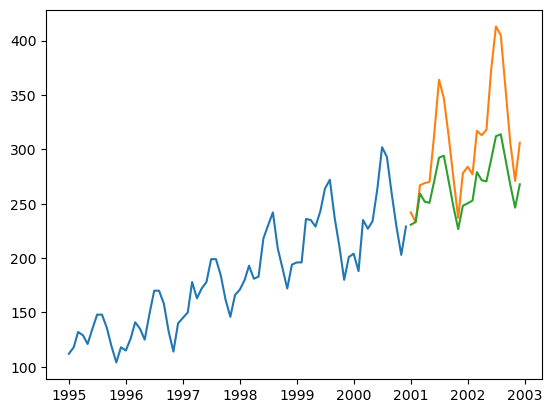

In [41]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(testresult_ta['TES_Add'])
plt.show()

In [42]:
mse13=mean_squared_error(test_data['Passengers'],testresult_ta['TES_Add'])
rmse14=np.sqrt(mse13)
mae15=mean_absolute_error(test_data['Passengers'],testresult_ta['TES_Add'])
mape16=mean_absolute_percentage_error(test_data['Passengers'],testresult_ta['TES_Add'])

In [43]:
test_metrics_ta=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [44]:
test_metrics_ta['TES_Add']=[mse13,rmse14,mae15,mape16]
test_metrics_ta

,TES_Add
MSE,2262.980603
RMSE,47.570796
MAE,39.883236
MAPE,0.120850


Triple Exponential Smoothing TR:Mul,SSNL:Mul

In [45]:
tesmul_model=ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul').fit()

C:\Users\sreen\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [46]:
testresult_tm=test_data.copy()

In [47]:
testresult_tm['TES_Mul']=tesadd_model.forecast(test_length)
testresult_tm.head(3)

,Passengers,TES_Mul
Month,,
2001-01-01,242,230.654423
2001-02-01,233,233.154024
2001-03-01,267,259.320552


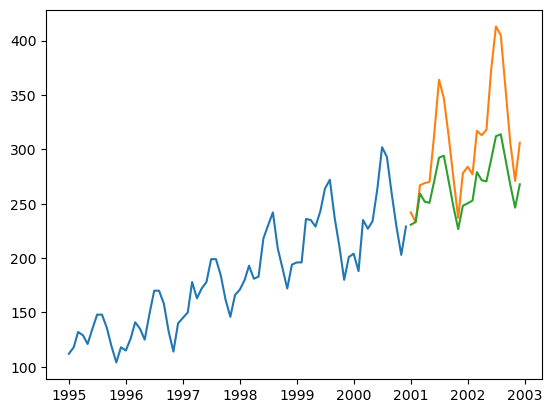

In [48]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(testresult_tm['TES_Mul'])
plt.show()

In [49]:
mse17=mean_squared_error(test_data['Passengers'],testresult_tm['TES_Mul'])
rmse18=np.sqrt(mse17)
mae19=mean_absolute_error(test_data['Passengers'],testresult_tm['TES_Mul'])
mape20=mean_absolute_percentage_error(test_data['Passengers'],testresult_tm['TES_Mul'])

In [50]:
test_metrics_tm=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [51]:
test_metrics_tm['TES_Mul']=[mse17,rmse18,mae19,mape20]
test_metrics_tm

,TES_Mul
MSE,2262.980603
RMSE,47.570796
MAE,39.883236
MAPE,0.120850


Cumlative_testresults

In [52]:
testresult['SES_Model']=ses
testresult['DES_A_Model']=desadd_model.forecast(test_length)
testresult['DES_M_Model']=desmul_model.forecast(test_length)
testresult['TES_A_Model']=tesadd_model.forecast(test_length)
testresult['TES_M_Model']=tesmul_model.forecast(test_length)
testresult

,Passengers,SES_Model,DES_A_Model,DES_M_Model,TES_A_Model,TES_M_Model
Month,,,,,,
2001-01-01,242,237.974268,230.691016,229.617770,230.654423,233.064640
2001-02-01,233,237.974268,232.382517,230.319547,233.154024,234.636500
2001-03-01,267,237.974268,234.074018,231.023469,259.320552,274.649519
2001-04-01,269,237.974268,235.765519,231.729542,251.820418,264.204622
2001-05-01,270,237.974268,237.457021,232.437773,250.820100,263.842410
2001-06-01,315,237.974268,239.148522,233.148169,271.319909,293.360716
2001-07-01,364,237.974268,240.840023,233.860735,292.320184,324.746514
2001-08-01,347,237.974268,242.531524,234.575480,294.153268,327.241195
2001-09-01,312,237.974268,244.223026,235.292409,270.652839,290.984003


Cumlative_testmetrics

In [53]:
test_metrics=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])
test_metrics['SES']=[mse1,rmse2,mae3,mape4]
test_metrics['DES_Add']=[mse5,rmse6,mae7,mape8]
test_metrics['DES_Mul']=[mse9,rmse10,mae11,mape12]
test_metrics['TES_Add']=[mse13,rmse14,mae15,mape16]
test_metrics['TES_Mul']=[mse17,rmse18,mae19,mape20]
test_metrics

,SES,DES_Add,DES_Mul,TES_Add,TES_Mul
MSE,6997.881659,5062.761521,6796.998343,2262.980603,2262.980603
RMSE,83.653342,71.153085,82.443910,47.570796,47.570796
MAE,68.646443,56.865556,68.252977,39.883236,39.883236
MAPE,0.205919,0.169917,0.205466,0.120850,0.120850


from the above table it is good to choose either Triple Exponential Addition or Multiplication method

In [54]:
final_model=ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul').fit()

C:\Users\sreen\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [55]:
forecast_values=final_model.forecast(test_length)
forecast_values

2003-01-01    315.020860
2003-02-01    311.710092
2003-03-01    361.242219
2003-04-01    352.911724
2003-05-01    354.367837
2003-06-01    403.885545
2003-07-01    450.864589
2003-08-01    445.627337
2003-09-01    395.607920
2003-10-01    347.205801
2003-11-01    304.942016
2003-12-01    348.184632
2004-01-01    357.251641
2004-02-01    353.497041
2004-03-01    409.669301
2004-04-01    400.222044
2004-05-01    401.873359
2004-06-01    458.029268
2004-07-01    511.306185
2004-08-01    505.366843
2004-09-01    448.641968
2004-10-01    393.751201
2004-11-01    345.821657
2004-12-01    394.861252
Freq: MS, dtype: float64

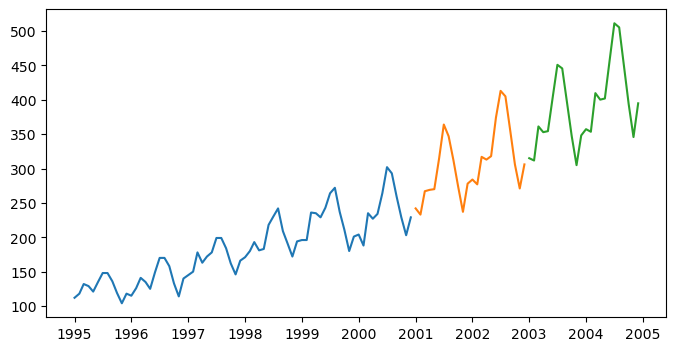

In [56]:
plt.figure(figsize=(8,4))
plt.plot(train_data)
plt.plot(test_data)
plt.plot(forecast_values)
plt.show()

# *********************************************************************************************************************************

# SECOND QUESTION CONTINUED HERE

# Forecast the CocaCola Price data set. Prepare a document for each model explaining
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [57]:
data1=pd.read_csv('CocaCola_Sales_Rawdata.csv')
data1

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [58]:
data1.isnull()

,Quarter,Sales
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


<Axes: >

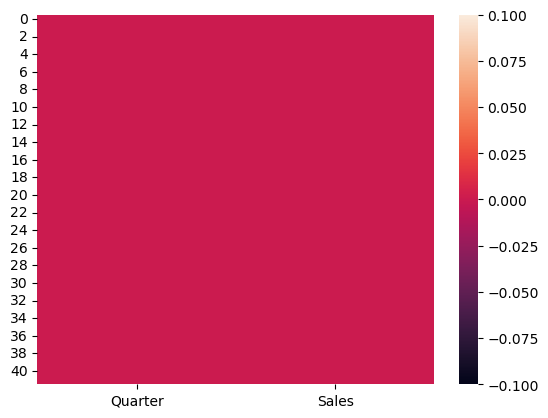

In [59]:
sns.heatmap(data1.isnull())

In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [61]:
data2=data1.copy()

In [62]:
data2.set_index('Quarter',inplace=True)

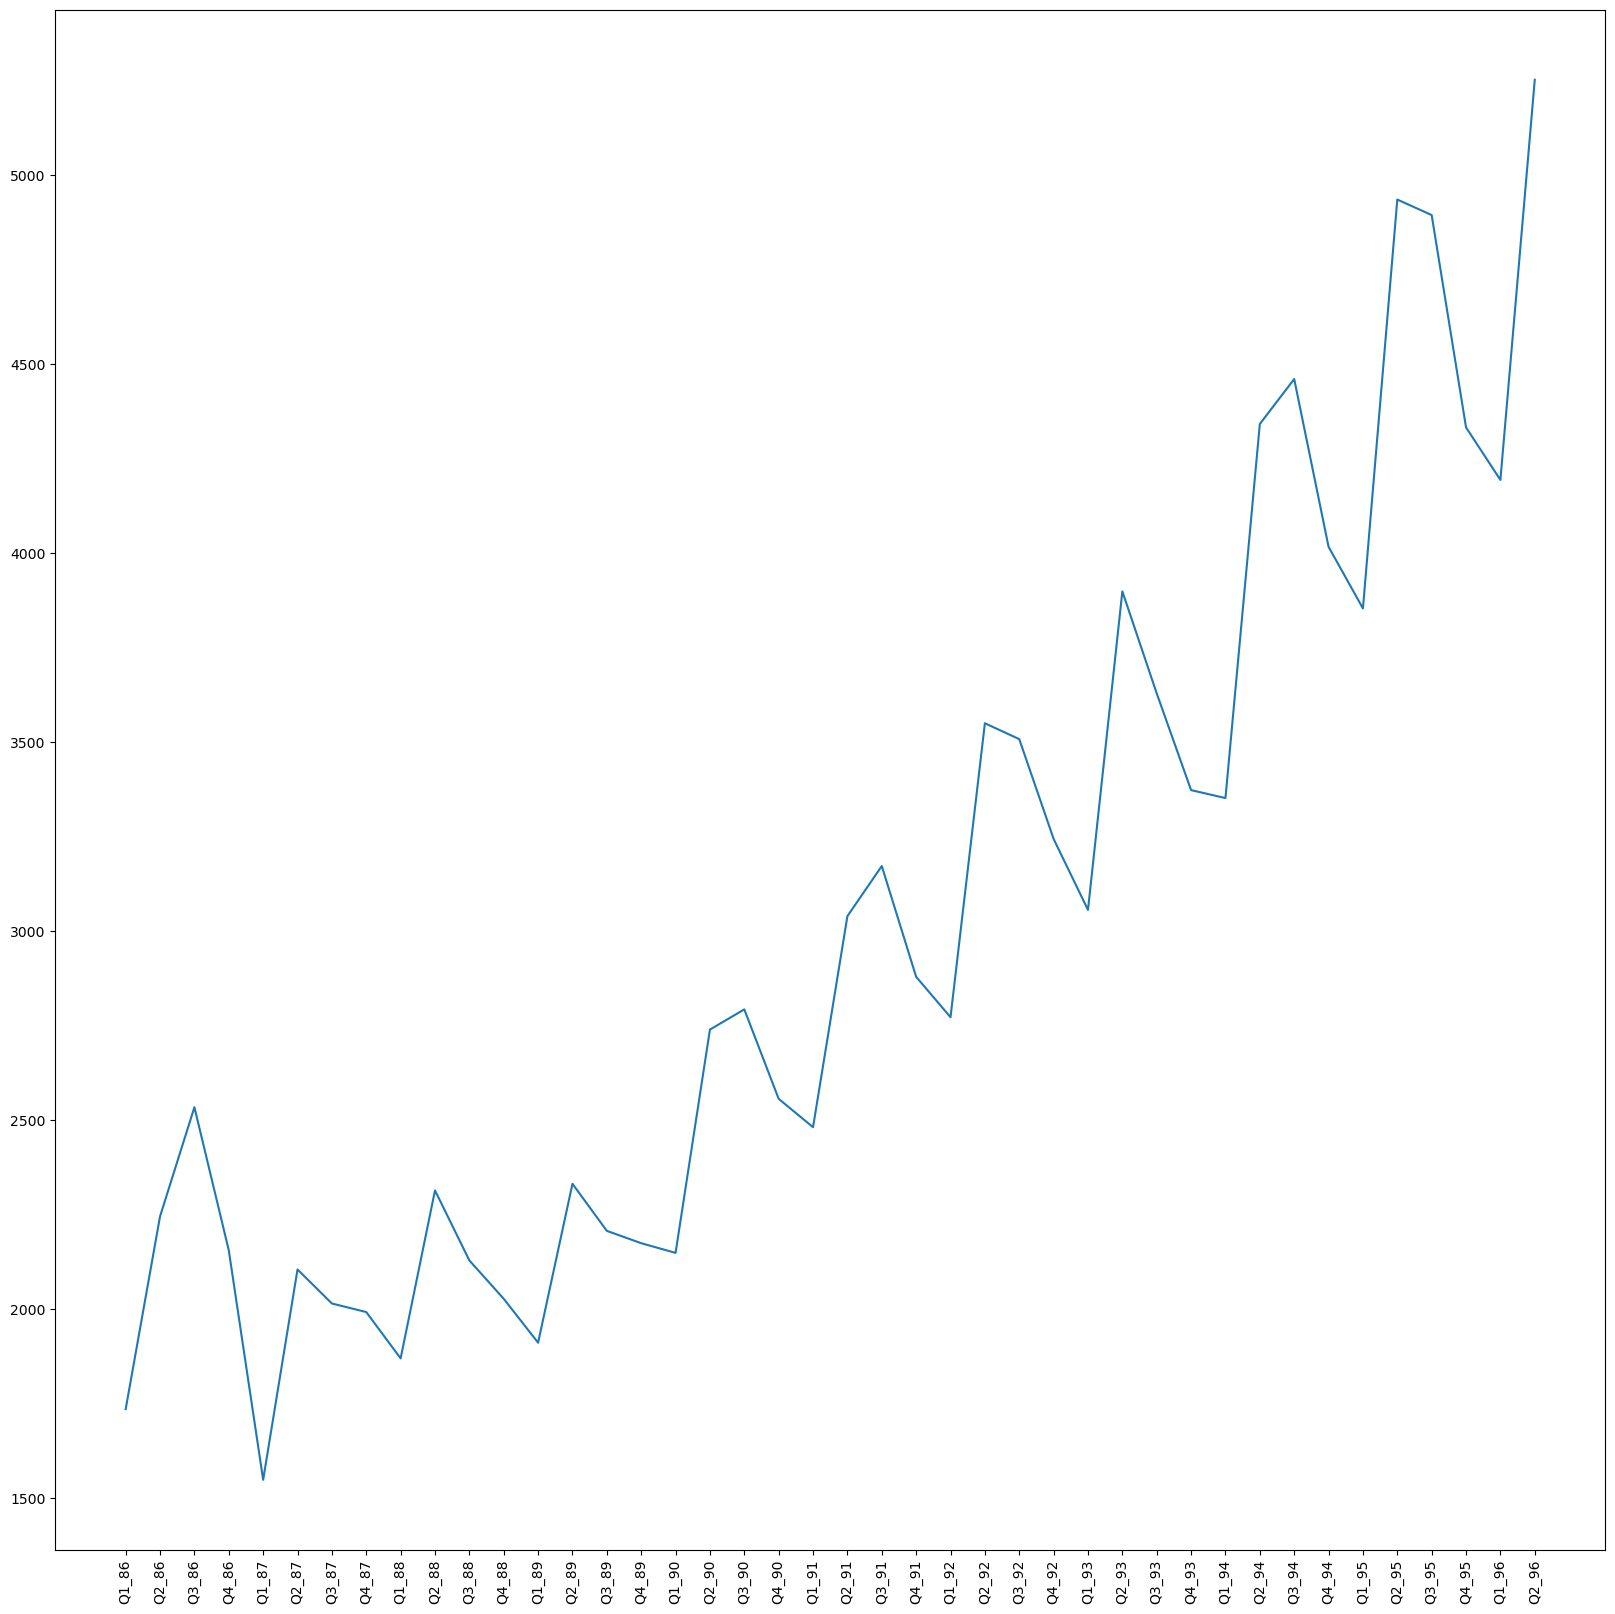

In [63]:
plt.figure(figsize=(20,20))
plt.plot(data2)
plt.xticks(rotation=90)
plt.show()

In [64]:
t = data1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
data1['quarter']=pd.to_datetime(t).dt.strftime('%b-%Y')
data1['quarter']=pd.to_datetime(data1['quarter'])

C:\Users\sreen\AppData\Local\Temp\ipykernel_14240\503756040.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  t = data1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')


In [65]:
data1.set_index('quarter',inplace=True)
data1.head()

,Quarter,Sales
quarter,,
1986-01-01,Q1_86,1734.827000
1986-04-01,Q2_86,2244.960999
1986-07-01,Q3_86,2533.804993
1986-10-01,Q4_86,2154.962997
1987-01-01,Q1_87,1547.818996


In [66]:
data1['Quarters'] = 0
data1['Year'] = 0
for i in range(42):
    p = data1["Quarter"][i]
    data1['Quarters'][i]= p[0:2]
    data1['Year'][i]= p[3:5]

C:\Users\sreen\AppData\Local\Temp\ipykernel_14240\3916267081.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Quarters'][i]= p[0:2]
C:\Users\sreen\AppData\Local\Temp\ipykernel_14240\3916267081.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Year'][i]= p[3:5]


In [67]:
data1.head()

,Quarter,Sales,Quarters,Year
quarter,,,,
1986-01-01,Q1_86,1734.827000,Q1,86
1986-04-01,Q2_86,2244.960999,Q2,86
1986-07-01,Q3_86,2533.804993,Q3,86
1986-10-01,Q4_86,2154.962997,Q4,86
1987-01-01,Q1_87,1547.818996,Q1,87


In [68]:
data3=data1.copy()

In [69]:
data3.drop('Quarter',axis=1,inplace=True)

In [70]:
data3

,Sales,Quarters,Year
quarter,,,
1986-01-01,1734.827000,Q1,86
1986-04-01,2244.960999,Q2,86
1986-07-01,2533.804993,Q3,86
1986-10-01,2154.962997,Q4,86
1987-01-01,1547.818996,Q1,87
1987-04-01,2104.411995,Q2,87
1987-07-01,2014.362999,Q3,87
1987-10-01,1991.746998,Q4,87
1988-01-01,1869.049999,Q1,88


In [71]:
data_encoded = pd.get_dummies(data3, columns=['Quarters'])
data_encoded.head()

,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
quarter,,,,,,
1986-01-01,1734.827000,86,1,0,0,0
1986-04-01,2244.960999,86,0,1,0,0
1986-07-01,2533.804993,86,0,0,1,0
1986-10-01,2154.962997,86,0,0,0,1
1987-01-01,1547.818996,87,1,0,0,0


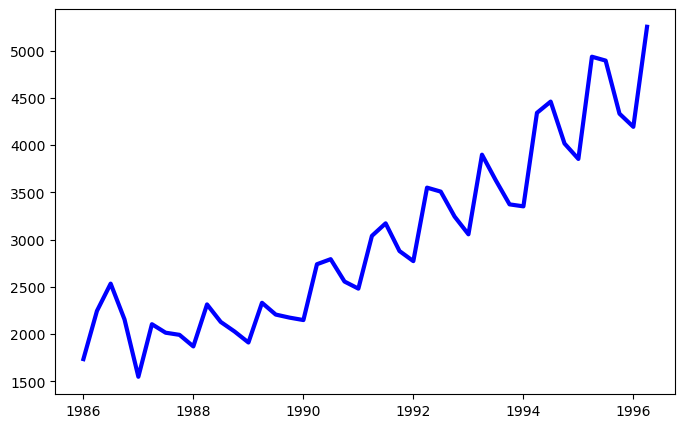

In [72]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(8,5))
plt.plot(data3['Sales'], color = 'blue', linewidth=3)
plt.show()

<Axes: >

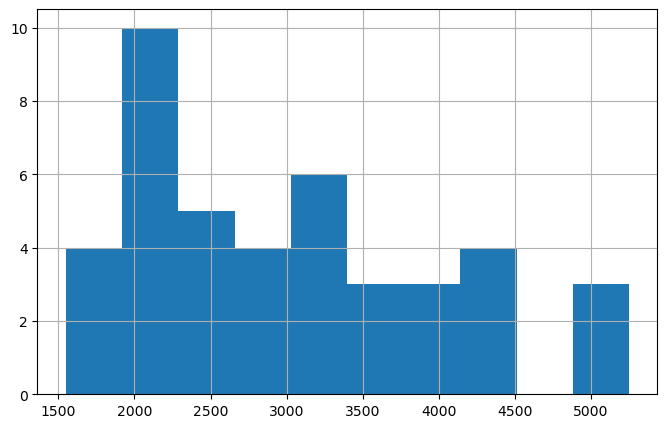

In [73]:
# Histogram
data3['Sales'].hist(figsize=(8,5))

<Axes: ylabel='Density'>

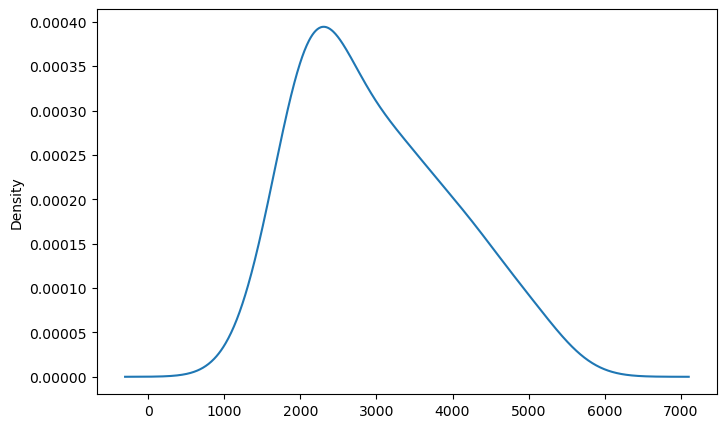

In [74]:
# Density Plot
data3['Sales'].plot(kind = 'kde', figsize=(8,5))

<Axes: xlabel='Quarters', ylabel='Sales'>

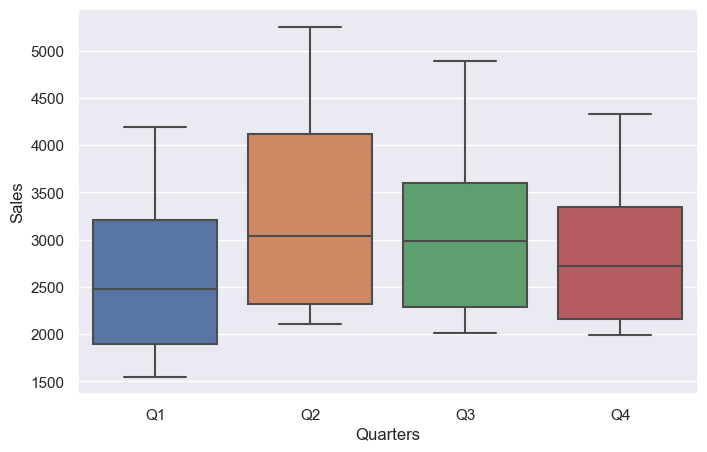

In [75]:
#boxplot of Quarters Vs. Sales
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="Quarters",y="Sales",data=data3)

<Axes: xlabel='Year', ylabel='Sales'>

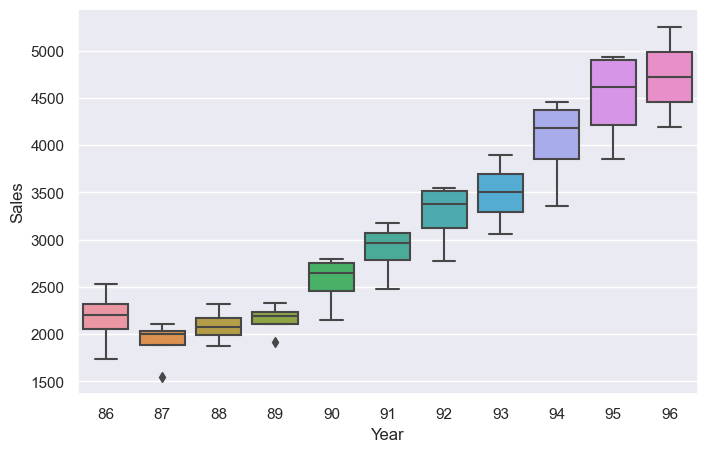

In [76]:
# boxplot of Years Vs. Sales
sns.boxplot(x="Year",y="Sales",data=data3)

<Axes: xlabel='Year', ylabel='Sales'>

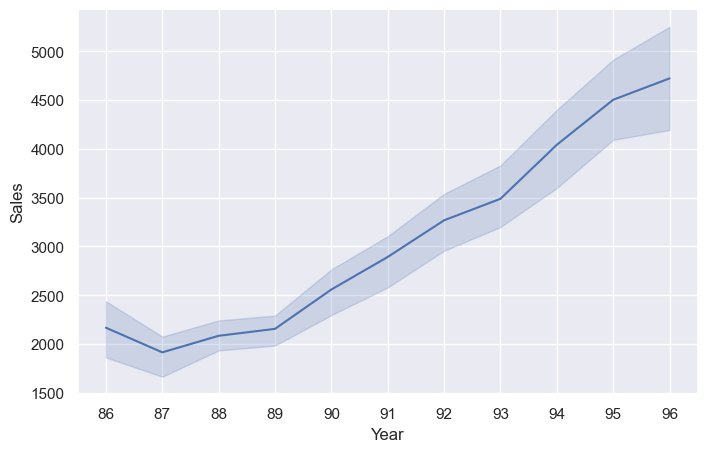

In [77]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=data3)

<Axes: xlabel='Quarters', ylabel='Year'>

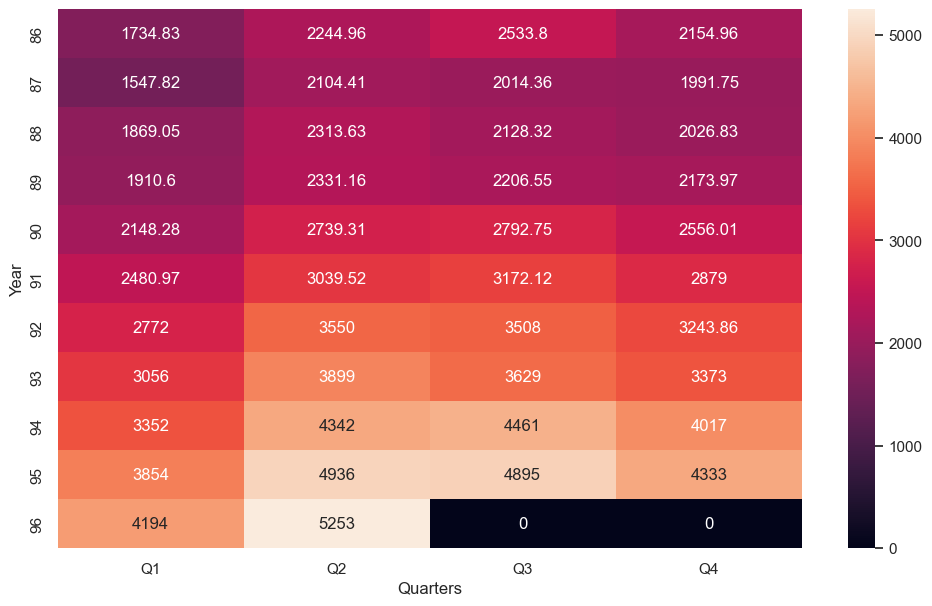

In [78]:
plt.figure(figsize=(12, 7))
heatmap_sales_quarter_year = pd.pivot_table(data=data3,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_sales_quarter_year,annot=True,fmt="g")

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

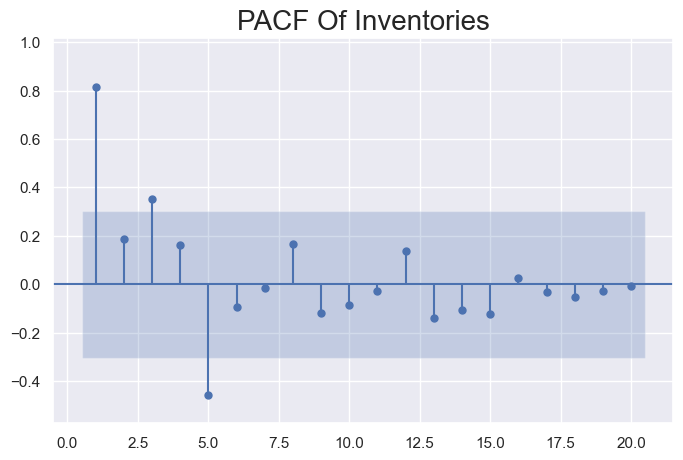

In [80]:
plot_pacf(data3.Sales, lags=20, zero=False,auto_ylims=True)
plt.title("PACF Of Inventories",size=20)
plt.show()

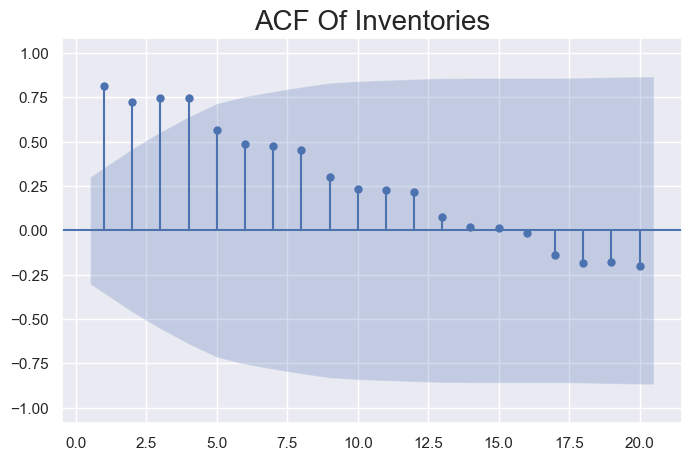

In [81]:
plot_acf(data3.Sales, lags=20, zero=False, auto_ylims=True)
plt.title("ACF Of Inventories",size=20)
plt.show()

In [82]:
endog = data3['Sales']

[]

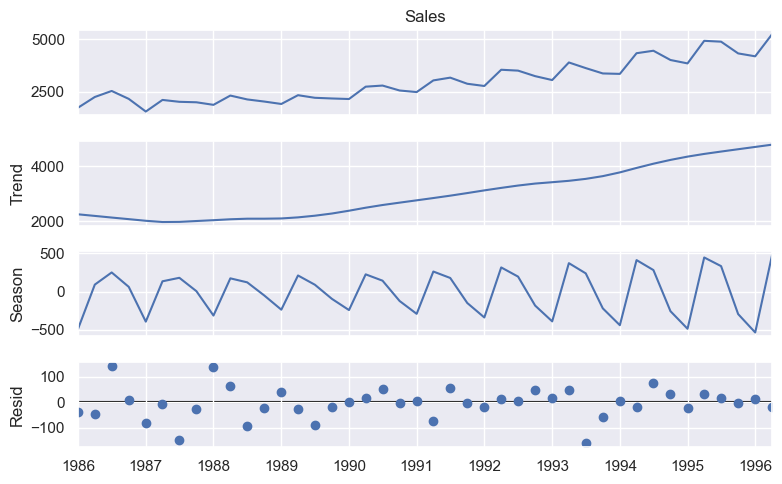

In [83]:
res = STL(endog).fit()
res.plot()
plt.plot()

In [84]:
train_length=int(len(data3)*0.75)
test_length=len(data3)-train_length
train_length,test_length

(31, 11)

In [85]:
train_data=data3.Sales.iloc[:train_length]
test_data=data3.Sales.iloc[train_length:]

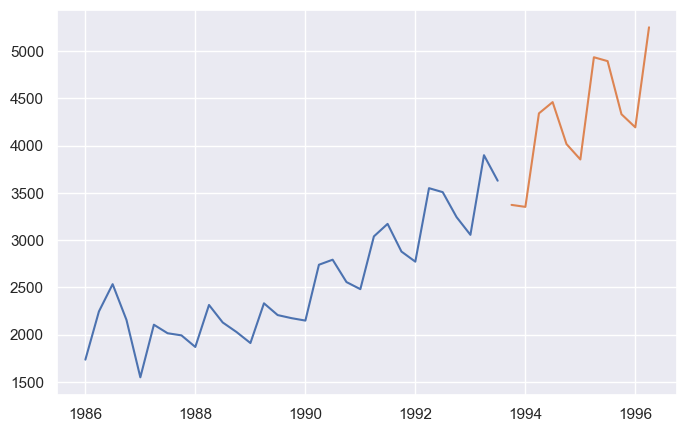

In [86]:
plt.plot(train_data)
plt.plot(test_data)
plt.show()

In [87]:
columns_drop=['Quarters','Year']

In [88]:
data4=data3.copy()

In [89]:
data4=data4.iloc[:,0]

In [90]:
data4

quarter
1986-01-01    1734.827000
1986-04-01    2244.960999
1986-07-01    2533.804993
1986-10-01    2154.962997
1987-01-01    1547.818996
1987-04-01    2104.411995
1987-07-01    2014.362999
1987-10-01    1991.746998
1988-01-01    1869.049999
1988-04-01    2313.631996
1988-07-01    2128.320000
1988-10-01    2026.828999
1989-01-01    1910.603996
1989-04-01    2331.164993
1989-07-01    2206.549995
1989-10-01    2173.967995
1990-01-01    2148.278000
1990-04-01    2739.307999
1990-07-01    2792.753998
1990-10-01    2556.009995
1991-01-01    2480.973999
1991-04-01    3039.522995
1991-07-01    3172.115997
1991-10-01    2879.000999
1992-01-01    2772.000000
1992-04-01    3550.000000
1992-07-01    3508.000000
1992-10-01    3243.859993
1993-01-01    3056.000000
1993-04-01    3899.000000
1993-07-01    3629.000000
1993-10-01    3373.000000
1994-01-01    3352.000000
1994-04-01    4342.000000
1994-07-01    4461.000000
1994-10-01    4017.000000
1995-01-01    3854.000000
1995-04-01    4936.000000
1995

In [91]:
### Augmented Dickey Fuller Test for Stationarity

In [92]:
from statsmodels.tsa.stattools import adfuller

In [93]:
def adf_test(data):
    ## H0: Data is not Stationary
    ## H1: Data is Stationary
    if adfuller(data)[1] > 0.05:
        print("Failed to reject the null hypothesis")
        print('Data is Not stationary')
    else:
        print("Reject the null hypothesis")
        print("Data is stationary")

In [94]:
adf_test(data4)

Failed to reject the null hypothesis
Data is Not stationary


In [95]:
### Diffrencing the data

In [96]:
from statsmodels.tsa.statespace.tools import diff

In [97]:
df_1 = diff(data4,k_diff=1)

In [98]:
adf_test(df_1)

Failed to reject the null hypothesis
Data is Not stationary


In [99]:
df_2= diff(data4,k_diff=2)

In [100]:
adf_test(df_2)

Reject the null hypothesis
Data is stationary


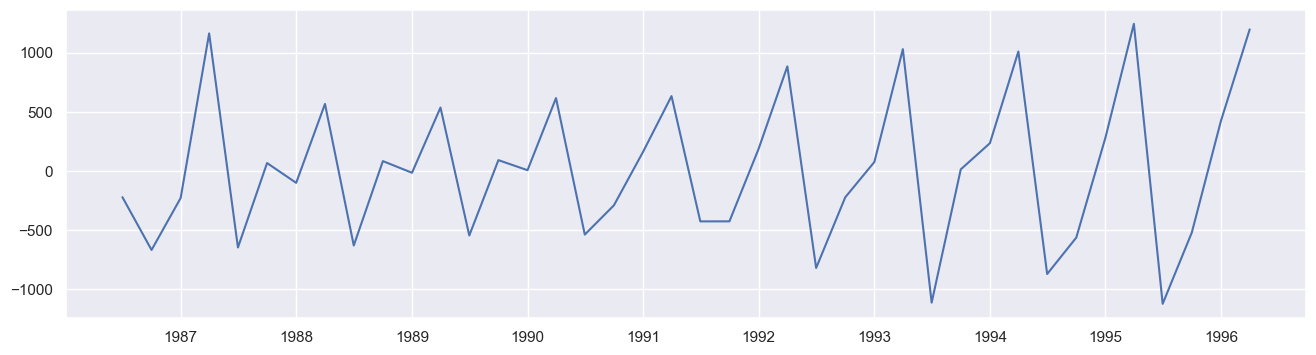

In [101]:
plt.figure(figsize=(16,4))

plt.plot(df_2)
plt.show()

In [102]:
### Find the order of AR , I and MA

In [103]:
### a. Use ACF and PACF plots

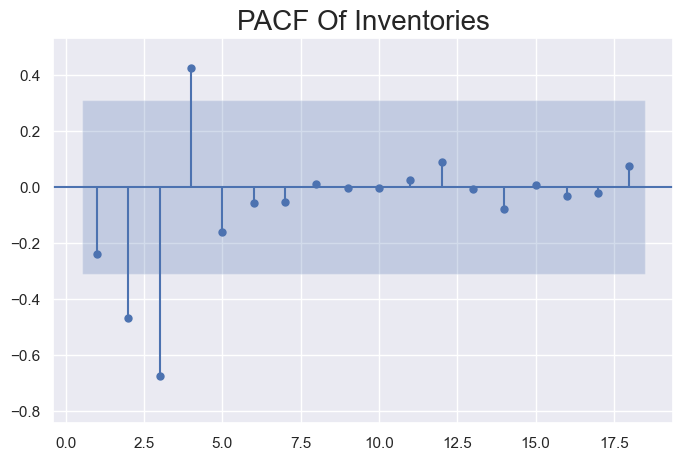

In [104]:
plot_pacf(df_2, lags=18, zero=False, auto_ylims=True)
plt.title("PACF Of Inventories",size=20)
plt.show()

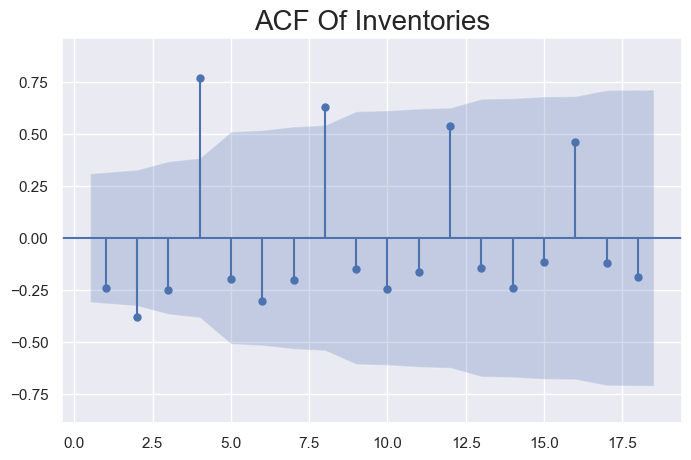

In [105]:
plot_acf(df_2, lags=18, zero=False, auto_ylims=True)
plt.title("ACF Of Inventories",size=20)
plt.show()

In [106]:
from pmdarima import auto_arima

In [107]:
auto_model=auto_arima(df_2,trace=True,seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=576.244, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=631.417, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=630.871, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=541.164, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=542.786, Time=0.11 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=544.594, Time=0.27 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=544.771, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=542.025, Time=0.08 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=547.607, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 1.97

In [108]:
train_length=int(len(df_2)*0.80)
test_length=len(df_2)-train_length
train_length,test_length

(32, 8)

In [109]:
df_2 = pd.DataFrame(df_2)

In [110]:
train_data=df_2.iloc[:train_length]
test_data=df_2.iloc[train_length:]

In [111]:
auto_model.predict(test_length)

1996-07-01   -1111.073282
1996-10-01    -457.134518
1997-01-01     431.639531
1997-04-01    1080.251062
1997-07-01   -1100.203523
1997-10-01    -367.669865
1998-01-01     441.990109
1998-04-01     969.714859
Freq: QS-OCT, dtype: float64

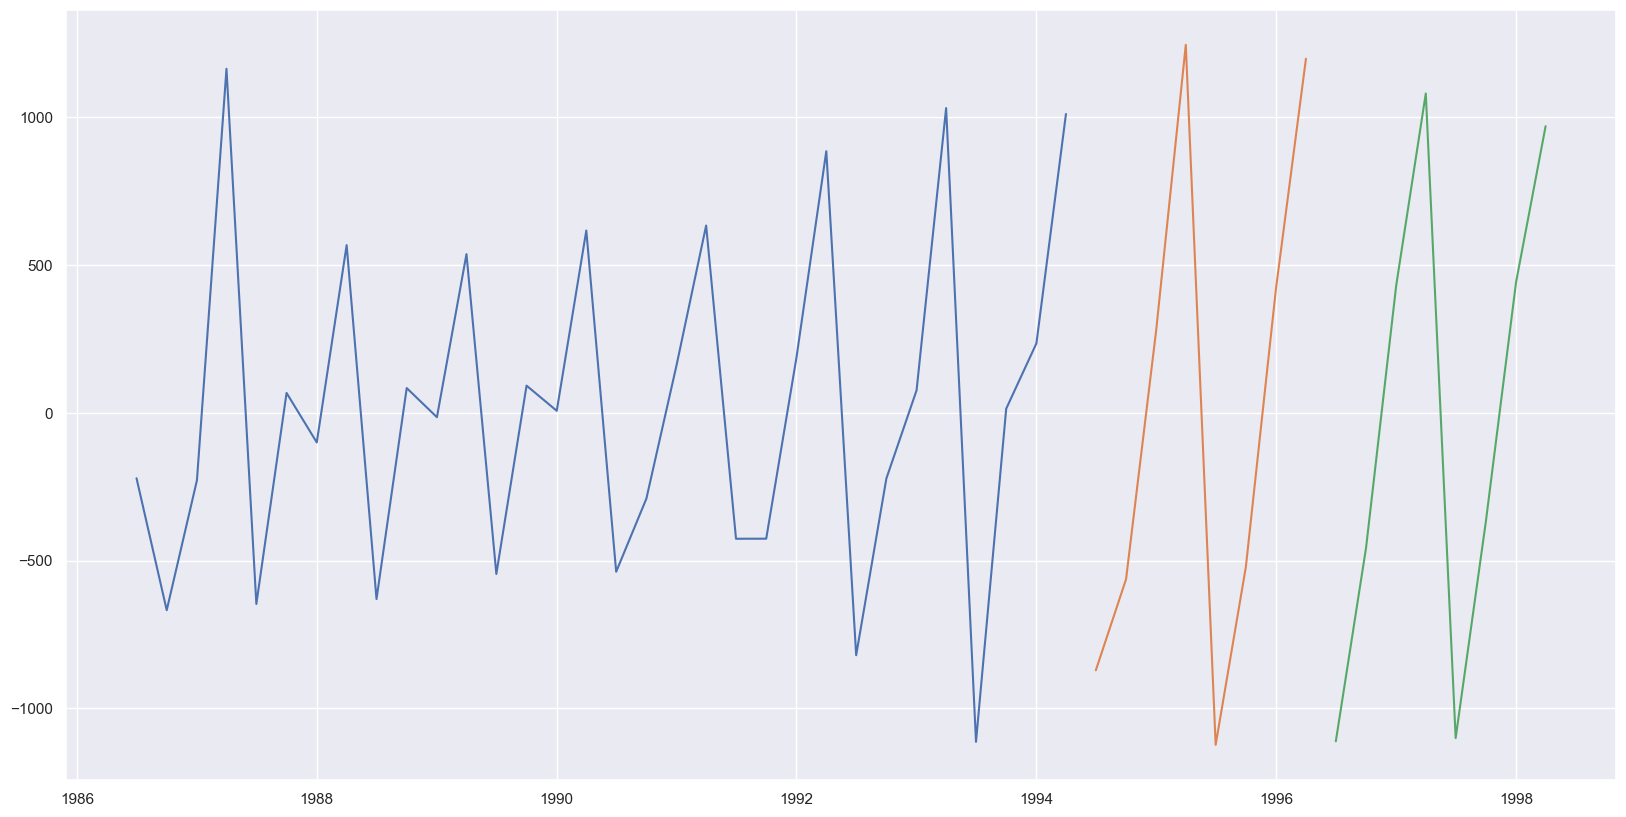

In [112]:
plt.figure(figsize=(20,10))
plt.plot(train_data)
plt.plot(test_data)
plt.plot(auto_model.predict(test_length)) 

In [113]:
#Perform the same using Exponential smoothing
#Basic raw data contains Trend + No Seasonality

In [114]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [115]:
train_length1=int(len(data_encoded)*0.80)
test_length1=len(data_encoded)-train_length1
train_length1,test_length1

(33, 9)

In [116]:
train_datas=data_encoded.Sales.astype(float).iloc[:train_length1]
test_datas=data_encoded.Sales.astype(float).iloc[train_length1:]

In [117]:
desadd_model = ExponentialSmoothing(train_datas, trend='add').fit()

C:\Users\sreen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [118]:
testresults=test_datas.copy()

In [119]:
testresults['DES_Add'] = desadd_model.forecast(test_length1)
testresults.head(3)

quarter
1994-04-01 00:00:00    4342.0
1994-07-01 00:00:00    4461.0
1994-10-01 00:00:00    4017.0
Name: Sales, dtype: object

[]

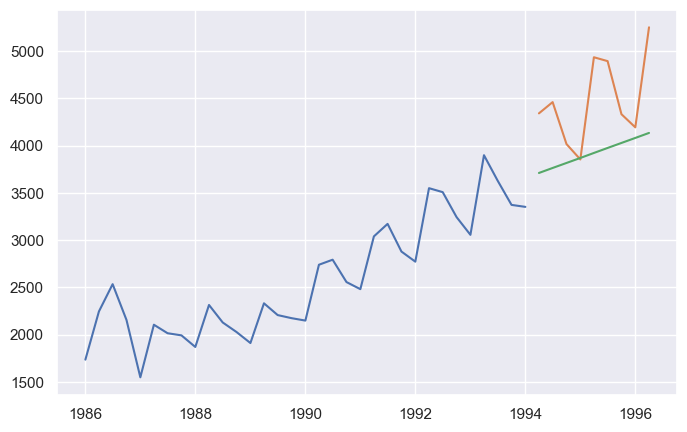

In [120]:
plt.plot(train_datas)
plt.plot(test_datas)
plt.plot(testresults['DES_Add'])
plt.plot()

In [121]:
mse=mean_squared_error(test_datas,testresults['DES_Add'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_datas,testresults['DES_Add'])
mape=mean_absolute_percentage_error(test_datas,testresults['DES_Add'])

In [122]:
test_metrics=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [123]:
test_metrics['DES_Add']=[mse,rmse,mae,mape]
test_metrics

,DES_Add
MSE,461260.610435
RMSE,679.161697
MAE,556.784592
MAPE,0.117600


In [124]:
data_encoded['Log_Sales'] = np.log(data_encoded['Sales'])

In [125]:
train_datas1=data_encoded.Log_Sales.astype(float).iloc[:train_length1]
test_datas1=data_encoded.Log_Sales.astype(float).iloc[train_length1:]

In [126]:
desmul_model = ExponentialSmoothing(train_datas1, trend='mul').fit()

C:\Users\sreen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [127]:
testresults['DES_Mul'] = desmul_model.forecast(test_length1)
testresults.head(3)

quarter
1994-04-01 00:00:00    4342.0
1994-07-01 00:00:00    4461.0
1994-10-01 00:00:00    4017.0
Name: Sales, dtype: object

[]

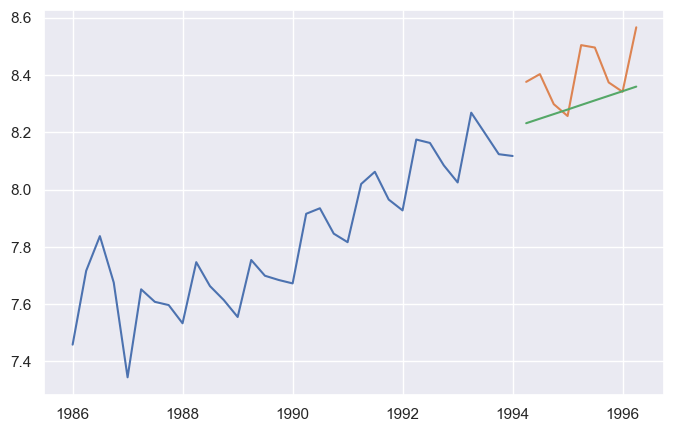

In [128]:
plt.plot(train_datas1)
plt.plot(test_datas1)
plt.plot(testresults['DES_Mul'])
plt.plot()

In [129]:
mse=mean_squared_error(test_datas1,testresults['DES_Mul'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_datas1,testresults['DES_Mul'])
mape=mean_absolute_percentage_error(test_datas,testresults['DES_Mul'])

In [130]:
test_metrics=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [131]:
test_metrics['DES_Mul']=[mse,rmse,mae,mape]
test_metrics

,DES_Mul
MSE,0.018838
RMSE,0.137252
MAE,0.111837
MAPE,0.998130


In [132]:
final_model=ExponentialSmoothing(data_encoded['Log_Sales'],trend='mul').fit()

C:\Users\sreen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [133]:
forecast_values=final_model.forecast(test_length1)

In [134]:
forecast_values

1996-07-01    8.528851
1996-10-01    8.555978
1997-01-01    8.583190
1997-04-01    8.610490
1997-07-01    8.637876
1997-10-01    8.665349
1998-01-01    8.692909
1998-04-01    8.720558
1998-07-01    8.748294
Freq: QS-OCT, dtype: float64

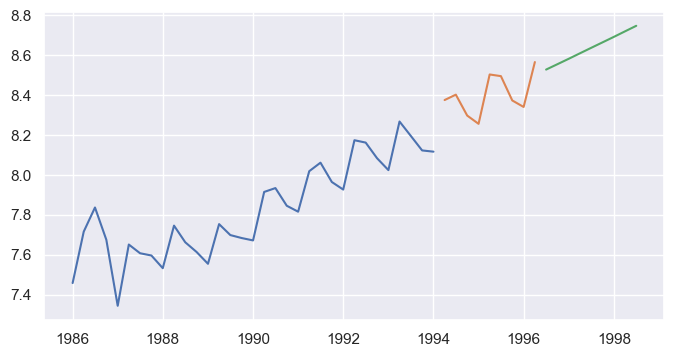

In [135]:
plt.figure(figsize=(8,4))
plt.plot(train_datas1)
plt.plot(test_datas1)
plt.plot(forecast_values)
#plt.xlim('1958-01-01','1960-12-01')
plt.show()

In [136]:
data_encoded['Log_Sales'] = np.log(data_encoded['Sales'])
new_data=data_encoded

In [137]:
###Its better to do in Double Exponential Smoothing Multiplicative Method

In [138]:
new_data=data_encoded

In [139]:
len(new_data)

42

In [140]:
t=np.arange(1,43)

In [141]:
new_data['t'] =t

In [142]:
new_data['t_sq'] = new_data['t']*new_data['t']

In [143]:
new_data

,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,Log_Sales,t,t_sq
quarter,,,,,,,,,
1986-01-01,1734.827000,86,1,0,0,0,7.458663,1,1
1986-04-01,2244.960999,86,0,1,0,0,7.716443,2,4
1986-07-01,2533.804993,86,0,0,1,0,7.837477,3,9
1986-10-01,2154.962997,86,0,0,0,1,7.675529,4,16
1987-01-01,1547.818996,87,1,0,0,0,7.344602,5,25
1987-04-01,2104.411995,87,0,1,0,0,7.651791,6,36
1987-07-01,2014.362999,87,0,0,1,0,7.608058,7,49
1987-10-01,1991.746998,87,0,0,0,1,7.596767,8,64
1988-01-01,1869.049999,88,1,0,0,0,7.533186,9,81


In [144]:
import statsmodels.formula.api as smf

In [145]:
train1, test1 = np.split(new_data, [int(.67 *len(new_data))])

In [146]:
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224131670788

In [147]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975323821

In [148]:
expo=smf.ols('Log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405105639889

In [149]:
additive= smf.ols('Sales~ Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1770.007917041625

In [150]:
addlinear= smf.ols('Sales~t+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear


696.6333922144973

In [151]:
addquad=smf.ols('Sales~t+t_sq+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

707.7965578317817

In [152]:
mulsea=smf.ols('Log_Sales~Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1809.673357039924

In [153]:
mullin= smf.ols('Log_Sales~t+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

492.57755978736463

In [154]:
mul_quad= smf.ols('Log_Sales~t+t_sq+Quarters_Q1+Quarters_Q2+Quarters_Q3+Quarters_Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Quarters_Q1','Quarters_Q2','Quarters_Q3','Quarters_Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

2015.374539875914

In [155]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [156]:
rmse=pd.DataFrame(output)

In [157]:
print(rmse)


           Model       Values
0  rmse_mul_quad  2015.374540
1        rmseadd  1770.007917
2  rmseaddlinear   696.633392
3    rmseaddquad   707.796558
4       rmseexpo   588.140511
5        rmselin   580.122413
6        rmsemul  1809.673357
7      rmsemulin   492.577560
8       rmsequad   783.729798


Linear with Rmse  has the best RMSE value